In [1]:
%matplotlib inline
save_directory = '../../../thesis/kid/'
save = False

In [2]:
from scipy.constants import h, k as k_B, pi
from scipy.special import ellipk, ellipe

In [3]:
def sigma1_over_sigmaN(f, gap):
    k2 = (np.abs(2 * gap - h * f) / (2 * gap + h * f))**2
    return ((1 + (2 * gap) / (h * f)) * ellipe(k2) -
            2 * (2 * gap) / (h * f) * ellipk(k2))

def sigma2_over_sigmaN(f, gap):
    k2 = (np.abs(2 * gap - h * f) / (2 * gap + h * f))**2
    kp2 = 1 - k2
    return (1 / 2) * (((2 * gap) / (h * f) + 1) * ellipe(kp2) + 
                      ((2 * gap) / (h * f) - 1) * ellipk(kp2))

def sigma_over_sigmaN(f, gap):
    return sigma1_over_sigmaN(f, gap) - 1j * sigma2_over_sigmaN(f, gap)

In [4]:
T_c = 1.4
gap = 1.76 * k_B * T_c
f_gap = 2 * gap / h
f = np.linspace(1.001 * f_gap, 5 * f_gap, 1000)
S = sigma_over_sigmaN(f=f, gap=gap)
R = 1 / S

In [5]:
color1 = 'blue'
color2 = 'red'
label1 = r'$\sigma_1 / \sigma_N$'
label2 = r'$\sigma_2 / \sigma_N$'

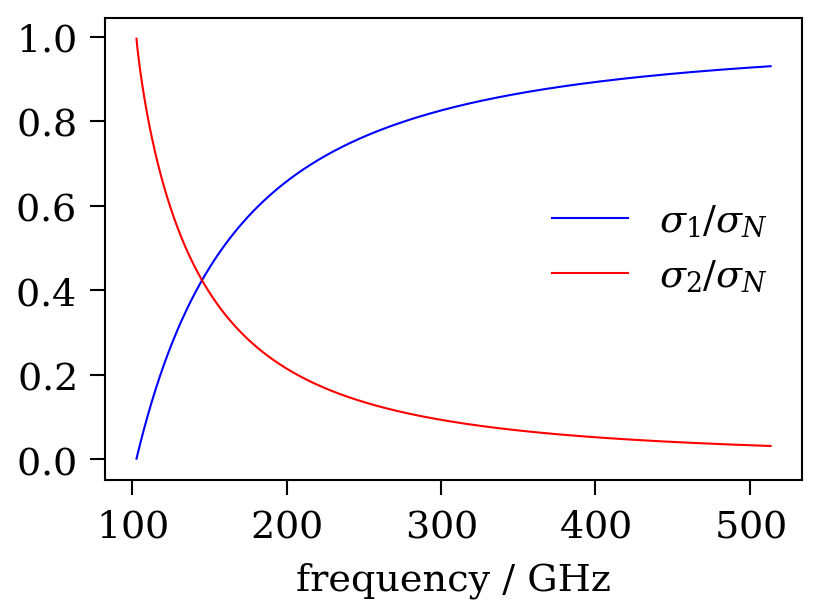

In [6]:
f_scale = 1e-9
fig, ax = plt.subplots()
ax.set_xlabel('frequency / GHz')
ax.plot(f_scale * f, S.real, '-', color=color1, label=label1)
ax.plot(f_scale * f, -S.imag, '-', color=color2, label=label2)
ax.legend(loc='best')

if save:
    fig.savefig(save_directory + 'conductivity_vs_frequency_above_gap.pdf')

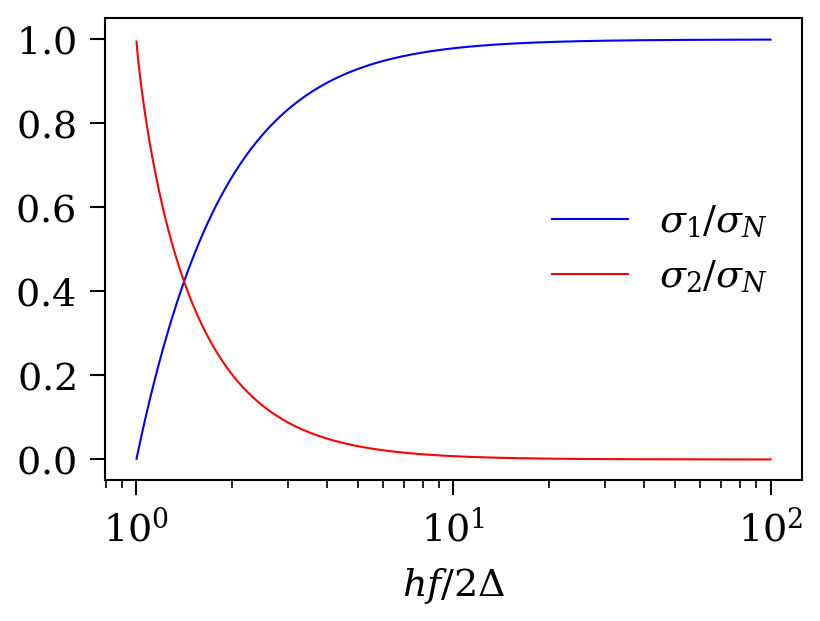

In [7]:
fl = np.logspace(np.log10(1.001 * f_gap), np.log10(100 * f_gap), 1000)
Sl = sigma_over_sigmaN(fl, gap)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_xlabel('$h f / 2 \Delta$')
#ax.set_xlim(0.95, 105)
ax.set_ylim(-0.05, 1.05)
ax.plot(h * fl / (2 * gap), Sl.real, '-', color=color1, label=label1)
ax.plot(h * fl / (2 * gap), -Sl.imag, '-', color=color2, label=label2)
ax.legend(loc='center right')

if save:
    fig.savefig(save_directory + 'conductivity_vs_normalized_frequency_above_gap.pdf')

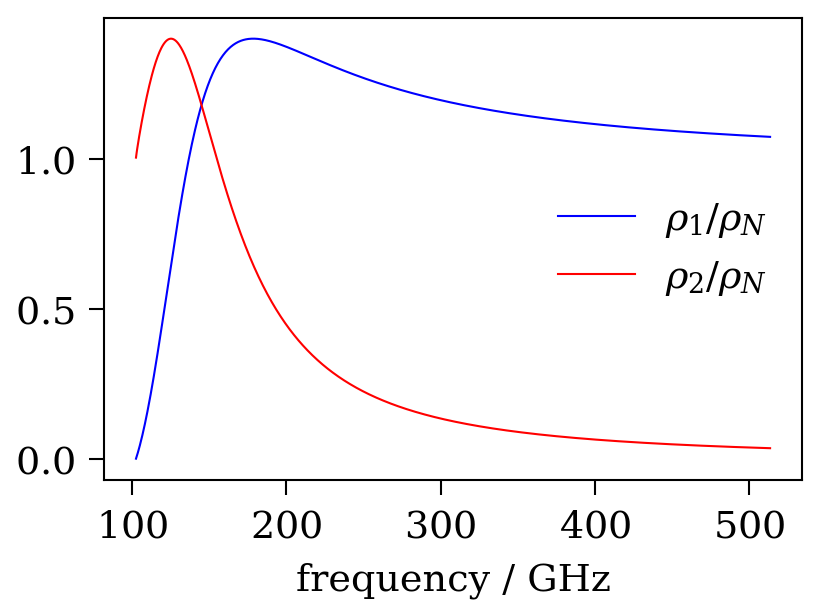

In [8]:
f_scale = 1e-9
fig, ax = plt.subplots()
ax.set_xlabel('frequency / GHz')
ax.plot(f_scale * f, R.real, '-', color=color1, label=r'$\rho_1 / \rho_N$')
ax.plot(f_scale * f, R.imag, '-', color=color2, label=r'$\rho_2 / \rho_N$')
ax.legend(loc='best')